# Random Walks

### Peter Onyisi

<img src="images/texas_logo.png" width="400" align="left"/>

In [1]:
# some standard setup stuff
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
import numpy
from math import sqrt
import math
import random

## Random Processes

In the world of classical mechanics, randomness comes from missing information. Instead of knowing outcomes ahead of time for sure, we assign probabilities. For example:

* we can't say when the next comet will arrive or how bright it will be, but we can give a rough rate of how many new comets there are per year.
* if you had extreme control you could throw a die to get exactly the number you want, but practically we assume equal probability to get each number from 1 to 6.
* you might expect a message from a friend between 7 and 10 pm, but you can't predict exactly what second it will arrive.

(This question of probability is much more fundamental in quantum mechanics.)

A prototype example of something influenced by randomness: the "Random Walk":
* after individual timesteps, a person/object/whatever can move by one unit from their current position, in a randomly chosen direction. 
* In a 1 dimensional random walk, that person might move by &pm;1 along the x axis every second, deciding which way to go by flipping a coin.

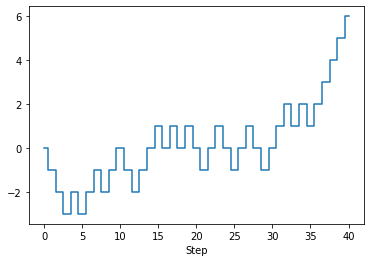

In [2]:
# 1 dimensional random walk
NSTEPS = 40
position = [0.] # start from the origin
for step in range(NSTEPS):
    # throw a uniform random number between 0 and 1. If >0.5 (happens 50% of the time) increase x by 1,
    # otherwise decrease x by 1.
    if random.random() > 0.5:
        motion = 1
    else:
        motion = -1
    # what is the new position? It's the last position (index -1 in Python) plus motion
    newpos = position[-1] + motion
    # add the new position to the list
    position.append(newpos)
    
# Plot the motion
# "x" axis of the plot is time, which starts from 0 and needs to proceed to NSTEPS (so NSTEPS+1 entries) 
# "y" axis of the plot is x positions above
# plot the step between the given positions ('mid')
plt.step(range(NSTEPS+1), position, where='mid')
plt.xlabel('Step')
plt.show()

a few features:
* often get a "run" of several steps in the same direction; each decision is random and does not remember the past. The random walk has no memory.
* the position of the walker at the end of their walk is probably not at the origin, although it's probably not so far away either.

A single random walk is random, so we can't predict it. What we can do is study the set of possible random walks: this is called an _ensemble_. In fact, we will look at a randomly chosen subset of possible random walks, which we will trust to be representative: this is called _sampling_.

To combine the information from multiple walks, we will use a thing called a histogram for visualization.

## Histograms

Histograms are a way of showing how measurements are distributed.  You define a number of bins and count the number of measurements with value inside the bin. The higher the bin, the more likely outcomes in that region are.

In this case, we will make bins in the value of x after 40 random walk steps. In principle this could be as low as -40 or as high as 40, but we expect these to be rare (you have to get 40 straight tails or heads). We would expect to get more walks where we end up somewhere near the middle.

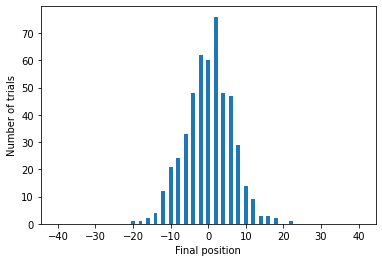

In [3]:
# 1 dimensional random walk, sampled multiple times
NSTEPS = 40
NSAMPLES = 500
# now we don't care about the itermediate positions; we just want to store a list of final positions
final_positions = []
for sample in range(NSAMPLES):
    # reset to zero
    position = 0
    for step in range(NSTEPS):
        # we use += which means "add the following to the existing variable"
        # and the convenience function "choice" which chooses with equal probability
        position += random.choice([-1,1])
    # now we should know where we wound up
    final_positions.append(position)
    
# let's make a histogram with 81 bins between -40.5 and 40.5 (keeps the bin edges integral)
plt.hist(final_positions, range=(-40.5,40.5), bins=81)
plt.xlabel('Final position')
plt.ylabel('Number of trials')
plt.show()

We made an even number of steps, so it is not possible for the final position to be an odd number - this accounts for the toothed nature of the plot.

We see that the "most likely" position is around 0, but in most cases the walker won't end up at zero. What happens if the walker walks a bit more?

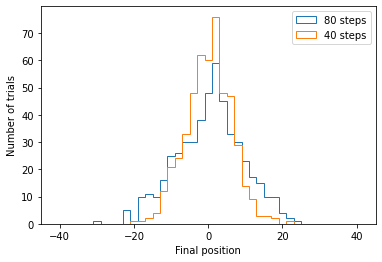

In [4]:
NSTEPS_2 = 80
# make a second list for the 80 step samples
final_positions_2 = []
for sample in range(NSAMPLES):
    # reset to zero
    position = 0
    for step in range(NSTEPS_2):
        # we use += which means "add the following to the existing variable"
        # and the convenience function "choice" which chooses with equal probability
        position += random.choice([-1,1])
    # now we should know where we wound up
    final_positions_2.append(position)
    
# let's make a histogram with 41 bins between -41 and 41 (keeps the bin edges integral, avoids odd numbers)
plt.hist(final_positions_2, range=(-41,41), bins=41, histtype='step', label='80 steps')
plt.hist(final_positions, range=(-41,41), bins=41, histtype='step', label='40 steps')
plt.legend()
plt.xlabel('Final position')
plt.ylabel('Number of trials')
plt.show()

The final positions after 80 steps are spread out further than after 40, but not _that_ much further - because the random walk has no memory, when you're far off on the left or on the right after 40 steps, the most likely thing to do is to remain where you are (and not to proceed further)!

Traditional statistics gives us a several ways of characterizing a distribution of values. Among them are the *mean*:

$$ \bar x = \frac{1}{N}\sum_i x_i $$

and the *standard deviation*:

$$ \sigma = \sqrt{\frac{1}{N}\sum_i (x_i-\bar x)^2} $$

. Here, the mean tells us about the "average position" (we would expect that to be zero) and the standard deviation tells us "how far from the mean can we expect to be?" Let's make ensembles for a number of step counts and compute the means and standard deviations.

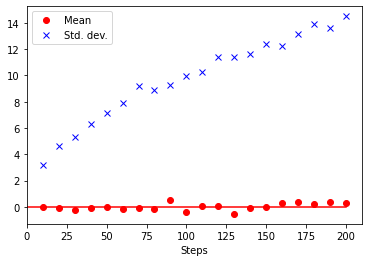

In [5]:
# a sequence of numbers 10, 20, ..., 200 ; it's the range from 10 (inclusive) to 201 (exclusive) by gaps of 10
STEP_LENGTHS = range(10, 201, 10)
# empty lists we will append to
means = []
stddevs = []
for nsteps in STEP_LENGTHS:
    final_positions = [] # reset
    for sample in range(NSAMPLES):
        # reset to zero
        position = 0
        for step in range(nsteps):
            # we use += which means "add the following to the existing variable"
            # and the convenience function "choice" which chooses with equal probability
            position += random.choice([-1,1])
        # now we should know where we wound up
        final_positions.append(position)
    # mean position is sum of positions divided by number of them
    mean = sum(final_positions)/NSAMPLES
    means.append(mean)
    # corrected standard deviation is almost square root of the mean value of (position-mean position) squared
    # here we will use "numpy", a package that makes it easy to operate on large numbers of values at once
    np_final_positions = numpy.array(final_positions)
    final_diffs = np_final_positions - mean # shift all values by the same amount
    final_diffs_sq = final_diffs ** 2
    stddevs.append(sqrt(numpy.sum(final_diffs_sq)/(NSAMPLES-1)))
    
# the i-th element of means and stddevs will correspond to the i-th element of STEP_LENGTHS, so we can plot one vs the other
plt.plot(STEP_LENGTHS, means, 'ro', label='Mean')
plt.plot(STEP_LENGTHS, stddevs, 'bx', label='Std. dev.')
# horizontal straight line (line between points with x-values: 0, 200; corresponding y-values 0, 0)
plt.plot([0, 200], [0, 0], 'r')
plt.xlim(0)
plt.xlabel('Steps')
plt.legend()
plt.show()

The mean stays near zero. It does not always come out _exactly_ at zero, which is a consequence of using a small ensemble instead of the full set of all possible paths; the randoness will still show itself.

The standard deviation grows with the number of steps. It can be shown that in fact it grows as $\sqrt{N}$:

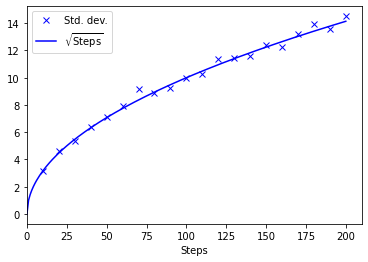

In [6]:
plt.plot(STEP_LENGTHS, stddevs, 'bx', label='Std. dev.')
# numpy.linspace generates an array of numbers
# numpy.linspace(0, 200, 200) generates 200 equally spaced numbers between 0 (inclusive) and 200 (exclusive)
plt.plot(numpy.linspace(0,200, 200), numpy.sqrt(numpy.linspace(0, 200, 200)), 'b', label='$\sqrt{\mathrm{Steps}}$')
plt.xlim(0)
plt.xlabel('Steps')
plt.legend()
plt.show()

Example physical situation: an object getting battered by collisions with atoms which could arrive from either left or right, and which cause it to travel left or right by one step before the next collision. 

* this can be modeled by a random walk
* The model predicts a slow diffusion away from the point of origin, where the standard deviation of the displacement would grow as the square root of the number of steps (or the elapsed time). Even if the individual steps are quite small, large displacements can be built up over time.  The physical manifestation of this called "Brownian motion."

One final note: the histogram of the distribution of $x$ positions in the 1D random walk can be approximated well by a function called the _normal_ or _Gaussian_ distribution:

$$
\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-(x-\mu)^2/2\sigma^2\right)
$$
Let's unpack this a bit:
* The symbolism $\mathcal{N}(x;\mu,\sigma)$ means that we _provide_ values of $\mu$ and $\sigma$, which are generally considered fixed, and then allow $x$ to vary. One way of reading this is "$\mathcal{N}$ of $x$ given $\mu$ and $\sigma$."
* $\mu$ is the true mean of the distribution, and $\sigma$ is the true standard deviation. In the case of the 1D random walk, for example, we would expect $\mu=0$ (the mean is zero) and $\sigma = \sqrt{N}$ (after $N$ steps), as we saw above.
* once $\mu$ and $\sigma$ are fixed, the integral $\int \mathcal{N}\ dx$ is always one, and it is never negative. This allows it to be a "probability distribution function" (PDF), i.e. a function that describes a possible distribution of probability.

Let's compare a random walk histogram with the probability distribution $\mathcal{N}$. If we run 500 samples, let's scale up $\mathcal{N}$ by a factor of 500 (since $\mathcal{N}$ shows the probability distribution for a single random walk).

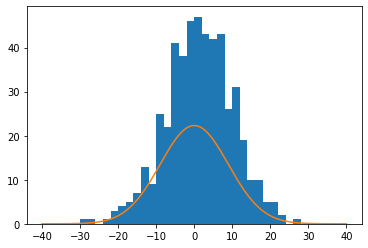

In [7]:
# do 80 step random walks
NSTEPS_3 = 80
# make a list for the 80 step samples
final_positions_3 = []
for sample in range(NSAMPLES):
    # reset to zero
    position = 0
    for step in range(NSTEPS_3):
        # we use += which means "add the following to the existing variable"
        # and the convenience function "choice" which chooses with equal probability
        position += random.choice([-1,1])
    # now we should know where we wound up
    final_positions_3.append(position)

# make a function to return the normal distribution; use numpy exp function to permit it to take arrays
def normal_distribution(x, mu, sigma):
    return (1./sqrt(2*math.pi*sigma**2) * numpy.exp(-(x-mu)**2/(2*sigma**2)))

plt.hist(final_positions_3, range=(-40,40), bins=40)
# going to use a numpy array to make evaluating normal_distribution for a range of x values simpler.
xvalues = numpy.linspace(-40, 40, 200)
plt.plot(xvalues, NSAMPLES*normal_distribution(xvalues, 0, sqrt(80)))
plt.show()

Hmmm... there seems to be a problem.  Actually the cause is quite simple. The histogram bins do not have width one (here we have constructed them to have width two). That means that if we integrate the area covered by the histogram, we don't get 500 in this case, but rather 500 $\times$ 2 = 1000, which means we ought to scale $\mathcal{N}$ by a factor of 1000:

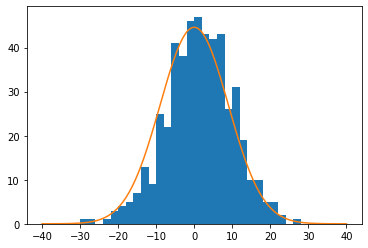

In [8]:
plt.hist(final_positions_3, range=(-40,40), bins=40)
# going to use a numpy array to make evaluating normal_distribution for a range of x values simpler.
xvalues = numpy.linspace(-40, 40, 200)
plt.plot(xvalues, 2*NSAMPLES*normal_distribution(xvalues, 0, sqrt(80)))
plt.show()

This starts to get annoying (especially if we change the binning of the histogram) so `matplotlib` provides a convenient "density" option to making histograms that scales the histogram _down_ by the appropriate amount to make it match a probability function:

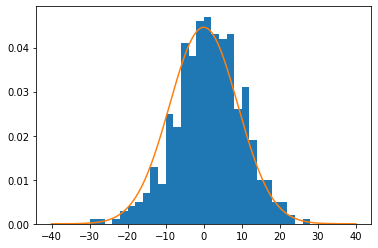

In [9]:
plt.hist(final_positions_3, range=(-40,40), bins=40, density=True)
# going to use a numpy array to make evaluating normal_distribution for a range of x values simpler.
xvalues = numpy.linspace(-40, 40, 200)
plt.plot(xvalues, normal_distribution(xvalues, 0, sqrt(80)))
plt.show()